This notebook is to calculate the probability that birth will happen on a specific day, given that it has not happened until that day.

Base probabilities are estimated from the statistics shown on Figure 1a of Okland et al, 2011 (DOI: 10.1002/uog.7728) fitted with a mixture of one Weibull and three normal distributions.

The idea is that by each day passing without birth, the next days' probabilities of giving birth are re-estimated using conditional probability. For each day, the probability of giving birth on that day if not before is returned.

In [9]:
import Pkg
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("StatsBase")
using Distributions
using Plots
using StatsBase
using Random

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Figure 1a from Okland et al, 2011
![Image](original_due_delivery.png)

In [10]:
my_model = MixtureModel([
        Normal(22, 10),
        Normal(30, 5),
        Weibull(10, 42),
        Normal(50, 1.75)],
    [0.1, 0.1, 0.7,  0.1])

MixtureModel{Distribution{Univariate, Continuous}}(K = 4)
components[1] (prior = 0.1000): Normal{Float64}(μ=22.0, σ=10.0)
components[2] (prior = 0.1000): Normal{Float64}(μ=30.0, σ=5.0)
components[3] (prior = 0.7000): Weibull{Float64}(α=10.0, θ=42.0)
components[4] (prior = 0.1000): Normal{Float64}(μ=50.0, σ=1.75)


In [11]:
Random.seed!(123);
datapoints = rand(my_model, 10000);

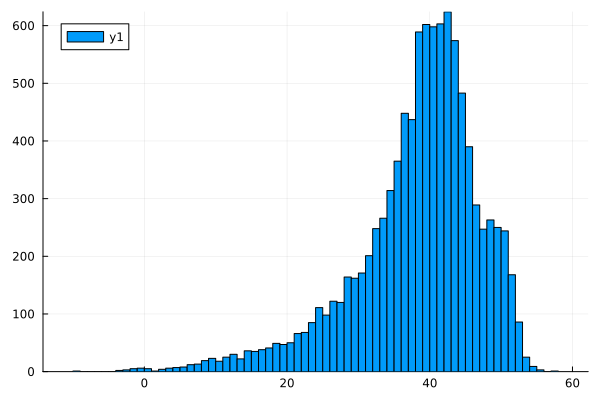

In [12]:
plot(datapoints, seriestype=:hist)

In [13]:
pdf(my_model, 40)

0.06001613621528105

The `datapoints` are used as proxi for a discretized function. The next section rescales the distribution day by day, so that for each "future" the total sums to 1.

In [14]:
day_datapoints = sort([ floor(Int, x) for x in datapoints]);

In [15]:
function calc_chance_by_day(today, day_of_interest, day_datapoints)
    day_datapoints_process = copy(day_datapoints)
    # remove all elements until the current day
    for day in minimum(day_datapoints_process):today-1
        filter!(e->e≠day,day_datapoints_process)
    end
    # count the frequency of the remaining days
    day_frequencies = countmap(day_datapoints_process)
    # normalize to get the probability of giving birth that day
    current_sum = sum(collect(values(day_frequencies)))
    chance_by_day = day_frequencies[day_of_interest] / current_sum
    return chance_by_day
end

calc_chance_by_day (generic function with 1 method)

Some examples. Feel free to try out calculating chance by day.

In [16]:
calc_chance_by_day(20, 20, day_datapoints)

0.005238893545683152

In [19]:
# day 0 we know there is 6% chance of giving birth on the due date
calc_chance_by_day(0, 40, day_datapoints)

0.05990183311629771

In [20]:
# day 20 we have more information, and the chance of giving birth on the due date increases
calc_chance_by_day(20, 40, day_datapoints)

0.0626571668063705

In [21]:
# for each day, the chance by day can be calculated (assuming we reached that day without birth)
for i in 20:40
    println(calc_chance_by_day(i, i, day_datapoints)*100)
end

0.5238893545683152
0.6951759005687803
0.7212558336868901
0.9081196581196582
1.196765498652291
1.069402007856831
1.3456871828810941
1.3416815742397137
1.85856754306437
1.8706697459584296
2.0122381736879262
2.4138345142308153
3.051932069899089
3.3764914953033762
4.125065685759327
5.001370238421486
6.461849127361892
6.738627602158828
9.738756613756614
11.027660743725958
12.312126827259625


In [29]:
# for each day, the chance by day can be calculated known from the perspective of a single day
for i in 26:55
    if i == 40
        print("due date: ")
    end
    if i == 46
        print("okt 12th: ")
    end
    println(calc_chance_by_day(25, i, day_datapoints)*100)
end

1.3312963771278918
1.3094718463553032
1.789611523352248
1.7677869925796594
1.865997381056307
2.193365342645133
2.7062418158009605
2.9026625927542558
3.426451331296377
3.982976865997381
4.8886948930597995
4.768659973810562
6.42732431252728
6.569183762549105
due date: 6.525534701003928
6.580096027935399
6.809253601047577
6.2636403317328675
5.2706241815800965
4.255783500654736
okt 12th: 3.153644696639022
2.695329550414666
2.869925796595373
2.7280663465735486
2.6625927542557837
1.8332605848974246
0.9384548232213007
0.2728066346573549
0.09821038847664776
0.032736796158882586


In [30]:
calc_chance_by_day(30, 30, day_datapoints)

0.020122381736879264

In [31]:
calc_chance_by_day(40, 40, day_datapoints)

0.12312126827259626

In [32]:
calc_chance_by_day(45, 45, day_datapoints)

0.19746835443037974

In [33]:
calc_chance_by_day(57, 57, day_datapoints)

1.0

In [36]:
all_days = [calc_chance_by_day(day,day, day_datapoints) for day in 0:55];
append!(all_days, calc_chance_by_day(57,57, day_datapoints));

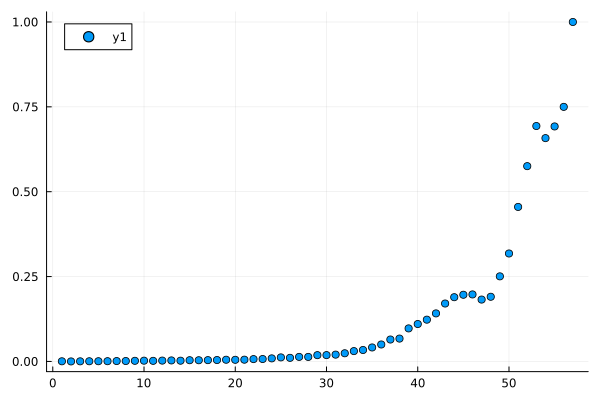

In [37]:
plot(all_days, seriestype=:scatter)